<a href="https://colab.research.google.com/github/zaephaer/MLU-08-Iris-SVM/blob/main/Iris_SVM_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) using Gaussian Radial Basis Function (RBF)

In [16]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import sys
import sklearn

print("Numpy version: ", np.__version__)
print("Panda version: ", pd.__version__)
print("System version: ", sys.version)
print("Sklearn version: ", sklearn.__version__)

Numpy version:  1.19.5
Panda version:  1.1.5
System version:  3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Sklearn version:  0.22.2.post1


In [17]:
# Load dataset
df = sns.load_dataset('iris')

# Define Feature and Target

In [18]:
# Select all variables as features
#col = ['sepal_length','sepal_width','petal_length','petal_width']
col = ['petal_length','petal_width']
X = df.loc[:, col]

# To see target unique output
df.species.unique()
# Convert target output into integer
species_to_num = {'setosa': 0,'versicolor': 1,'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

# Scaling feature
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

from sklearn import svm
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Cross Validation within Train Dataset

In [20]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]])

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


# Improving Model using Grid Search and Feature Scaling

In [22]:
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

from sklearn.model_selection import train_test_split, GridSearchCV 
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    1.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             pre_dispatch='2*n_jobs', refit=True, retur

In [23]:
svm_grid_rbf.best_score_
print("RBF Best Score: \t\t {0:.4f}".format(svm_grid_rbf.best_score_))

best = svm_grid_rbf.best_estimator_.get_params() 
for k in sorted(params.keys()): 
    print('Best parameter for {0}: \t {1:.2f}'.format(k, best[k]))

RBF Best Score: 		 0.9583
Best parameter for clf__C: 	 0.50
Best parameter for clf__gamma: 	 0.50


# Conducting validation in the test dataset

In [24]:
y_test_pred = svm_grid_rbf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [25]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


# SVM using RBF Visualization

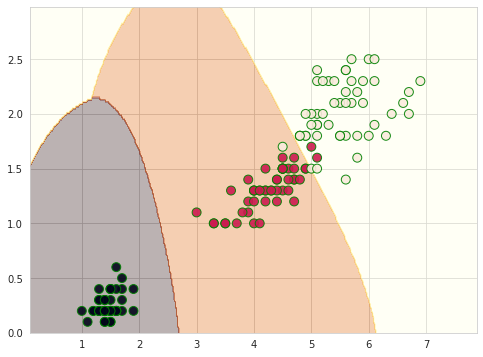

In [26]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');